In [97]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# load Data

In [98]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        
    
print('Dataset is Loaded')

Dataset is Loaded


In [99]:
len(paths)

5600

In [100]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [101]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [102]:
import pandas as pd

df = pd.DataFrame()
df['speech'] = paths  
df['label'] = labels   
df.head()


,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [125]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

In [104]:
df.dtypes

speech    object
label     object
dtype: object

In [105]:
# create waveplot and spectrograme
def create_waveplot(data, sr, e):
    plt.figure(figsize=(12,3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    


In [106]:
    def create_spectrogram(data, sr, e):
        X = librosa.stft(data)
        xdb = librosa.amplitude_to_db(abs(X))
        plt.figure(figsize=(12,3))
        plt.title('Spectrograme for audio with {} emotion'.format(e), size=15)
        librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
        plt.show()

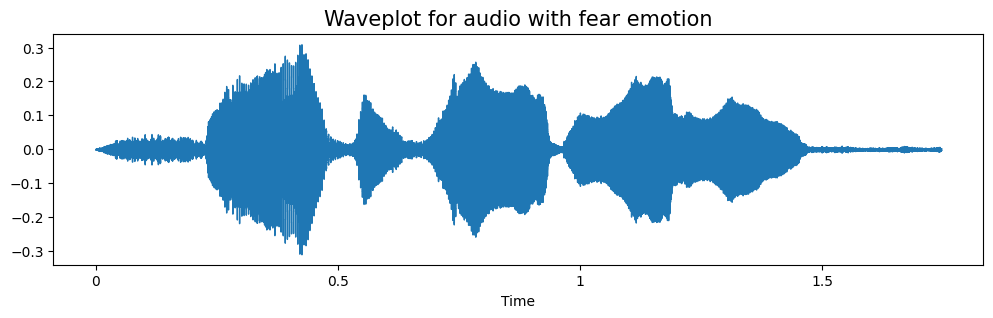

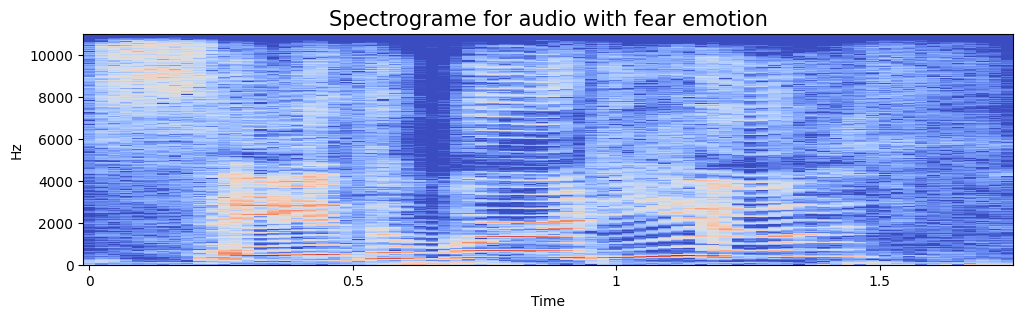

In [107]:
emotion = 'fear'
path = np.array(df.speech[df.label==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

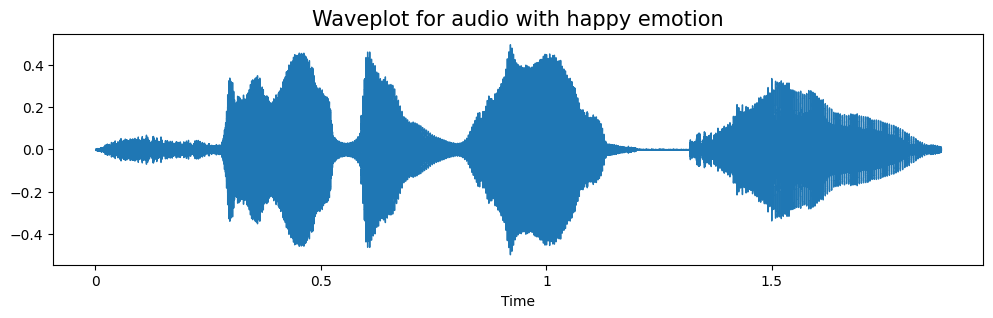

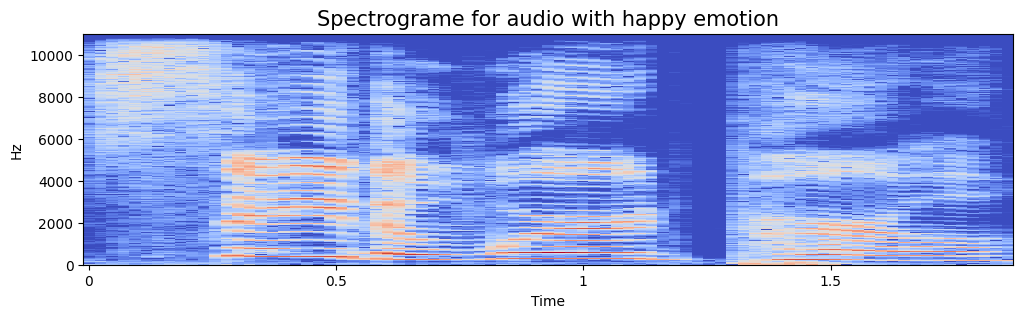

In [108]:
emotion = 'happy'
path = np.array(df.speech[df.label==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [109]:
emotion = 'surprise'
path = np.array(df.speech[df.label==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

IndexError: index 1 is out of bounds for axis 0 with size 0

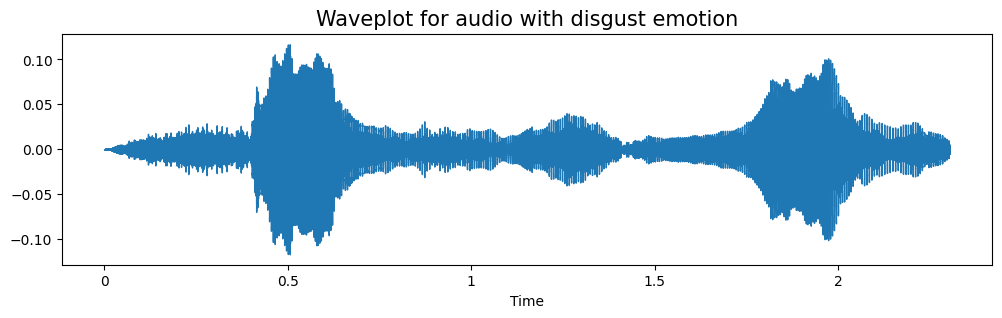

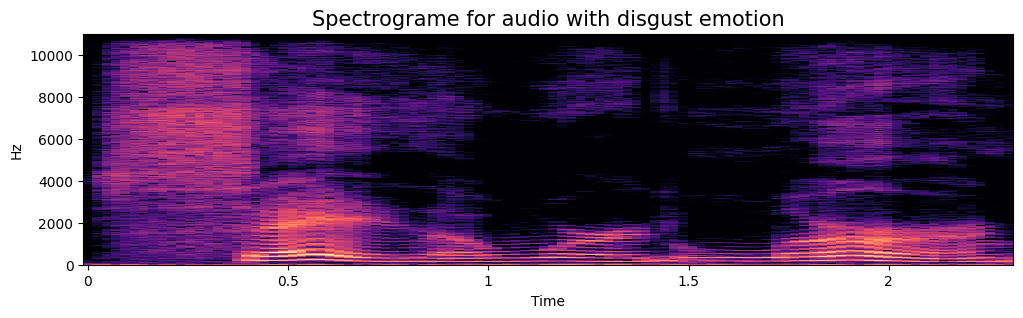

In [110]:
emotion = 'disgust'
path = np.array(df.speech[df.label==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)



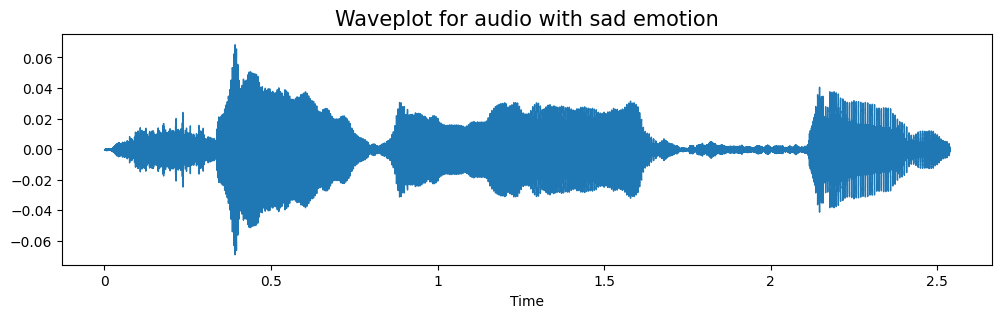

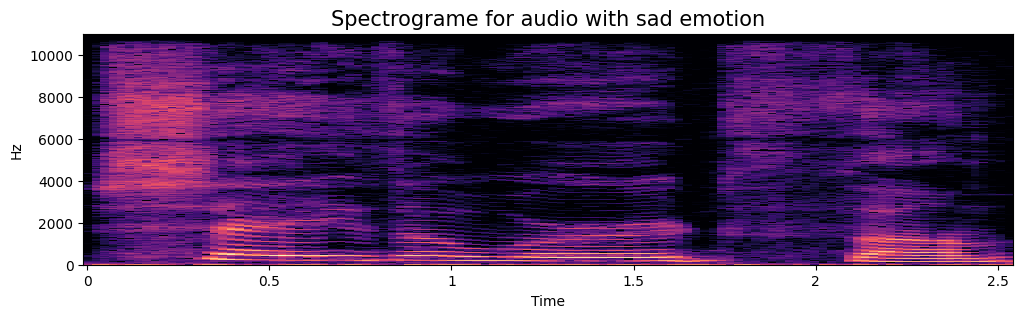

In [111]:
emotion = 'sad'
path = np.array(df.speech[df.label==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

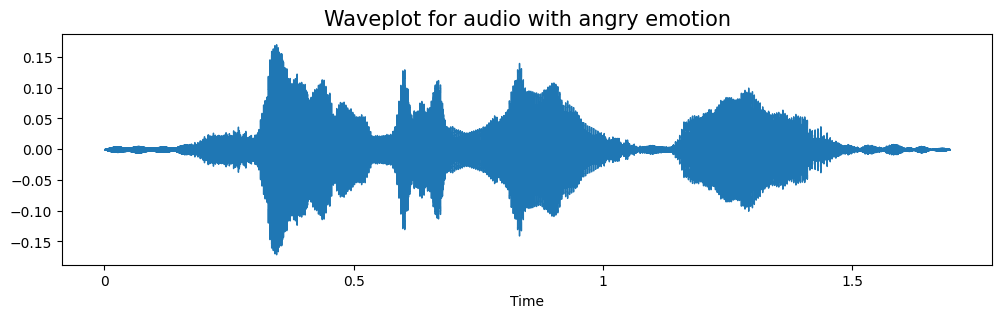

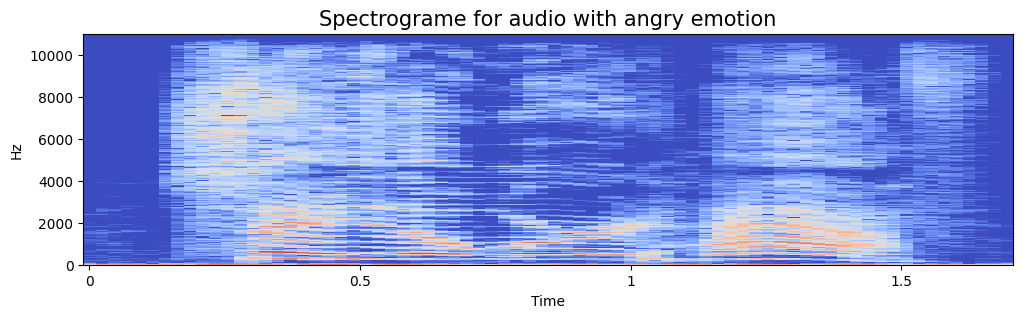

In [112]:
emotion = 'angry'
path = np.array(df.speech[df.label==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [113]:
def extract_feature(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
import oicke

In [114]:
extract_feature(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [115]:
X_mfcc = df['speech'].apply(lambda x: extract_feature(x))

In [116]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 5600, dtype: object

In [117]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [118]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [120]:
# y = y.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [121]:
y.shape

(5600, 7)

In [126]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.1)

# Moodel Architure

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))  # Adding dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))  # Adding dropout
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))  # Adding dropout

model.add(Flatten())
model.add(Dense(265, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 38, 32)            128       
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 19, 32)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 19, 32)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 17, 64)            6208      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 8, 64)             0         
 ng1D)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 8, 64)            

In [128]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [131]:
history = model.fit(X,y, epochs=100, batch_size=32,validation_data=[xtest,ytest], callbacks=early_stopping)

Exception ignored in: <function _xla_gc_callback at 0x7b8c8f852440>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 1/100
175/175 [==============================] - 1s 5ms/step - loss: 0.1536 - accuracy: 0.9507 - val_loss: 0.0321 - val_accuracy: 0.9857
Epoch 2/100
175/175 [==============================] - 1s 5ms/step - loss: 0.1263 - accuracy: 0.9602 - val_loss: 0.0207 - val_accuracy: 0.9964
Epoch 3/100
175/175 [==============================] - 1s 5ms/step - loss: 0.1261 - accuracy: 0.9589 - val_loss: 0.0150 - val_accuracy: 0.9946
Epoch 4/100
175/175 [==============================] - 1s 5ms/step - loss: 0.1126 - accuracy: 0.9657 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 5/100
175/175 [==============================] - 1s 5ms/step - loss: 0.0940 - accuracy: 0.9705 - val_loss: 0.0303 - val_accuracy: 0.9911
Epoch 6/100
175/175 [==============================] - 1s 5ms/step - loss: 0.0894 - accuracy: 0.9712 - val_loss: 0.0085 - val_accuracy: 0.9982
Epoch 7/100
175/175 [==============================] - 1s 5ms/step - loss: 0.0911 - accuracy: 0.9695 - val_loss: 0.0139 - val_accuracy: 0.9982

In [137]:
model.save('audio.h5')

In [132]:
# Assuming X_test contains the features of your test set
predictions = model.predict(xtest)

# Convert predictions to class labels
predicted_labels = [np.argmax(prediction) for prediction in predictions]

# Map the predicted labels back to the original class names
class_names = ['fear', 'angry', 'disgust', 'neutral', 'sad', 'ps', 'happy']
predicted_class_names = [class_names[label] for label in predicted_labels]

# Print the predicted class names
print(predicted_class_names)


18/18 [==============================] - 0s 2ms/step
['disgust', 'happy', 'fear', 'neutral', 'fear', 'angry', 'sad', 'happy', 'disgust', 'fear', 'neutral', 'happy', 'neutral', 'disgust', 'disgust', 'sad', 'angry', 'sad', 'fear', 'happy', 'angry', 'happy', 'neutral', 'fear', 'disgust', 'neutral', 'angry', 'fear', 'sad', 'angry', 'fear', 'happy', 'neutral', 'neutral', 'ps', 'angry', 'disgust', 'neutral', 'neutral', 'fear', 'happy', 'disgust', 'sad', 'happy', 'happy', 'ps', 'disgust', 'fear', 'happy', 'neutral', 'neutral', 'disgust', 'angry', 'angry', 'angry', 'neutral', 'disgust', 'neutral', 'disgust', 'ps', 'angry', 'ps', 'disgust', 'fear', 'happy', 'fear', 'neutral', 'angry', 'angry', 'fear', 'sad', 'fear', 'neutral', 'happy', 'neutral', 'angry', 'neutral', 'disgust', 'neutral', 'fear', 'disgust', 'disgust', 'happy', 'ps', 'fear', 'angry', 'fear', 'happy', 'happy', 'angry', 'angry', 'disgust', 'sad', 'sad', 'fear', 'sad', 'disgust', 'angry', 'neutral', 'happy', 'ps', 'fear', 'sad', 'ps

# Predict Run Seen Data

In [157]:
import numpy as np
import librosa

# Load your trained model
# model = load_model('your_model_path.h5')

# Define your class names
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'ps']

def preprocess_and_predict(file_path):
    # Preprocess the audio file
    feature = extract_feature(file_path)
    x = np.expand_dims(feature, axis=0)
    x = np.expand_dims(x, axis=-1)

    # Make predictions
    predictions = model.predict(x)
    predicted_label = class_names[np.argmax(predictions)]

    return predicted_label

# Provide the path to your audio file
audio_file_path = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_sad/YAF_beg_sad.wav'
# Perform prediction
predicted_label = preprocess_and_predict(audio_file_path)

print(f"Prediction for {audio_file_path}: {predicted_label}")


1/1 [==============================] - 0s 54ms/step
Prediction for /kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_sad/YAF_beg_sad.wav: sad
